# Economic Risk Assessment Tool
### Project Overview

This project uses unsupervised machine learning techniques to analyze and potentially group countries based on various socio-economic indicators. The main tools are:

Principal Component Analysis (PCA): Reduces the complexity of data by transforming it into a smaller set of uncorrelated variables (principal components). These components capture the most significant patterns in the data.
K-Means Clustering: Attempts to divide the countries into distinct groups (clusters) where countries within a cluster are more similar to each other than to countries in other clusters.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

These libraries provide tools for data manipulation (pandas), numerical operations (numpy), data visualization (matplotlib, seaborn), and machine learning algorithms (scikit-learn).

In [29]:
df = pd.read_csv('Country-data.csv')

In [30]:
df.head

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
X = df.iloc[:, 1:]

The CSV file containing country data is loaded into a pandas DataFrame.
df.describe() provides summary statistics of the data.
df.isnull().sum() checks for missing values in each column.

<Figure size 400x400 with 0 Axes>

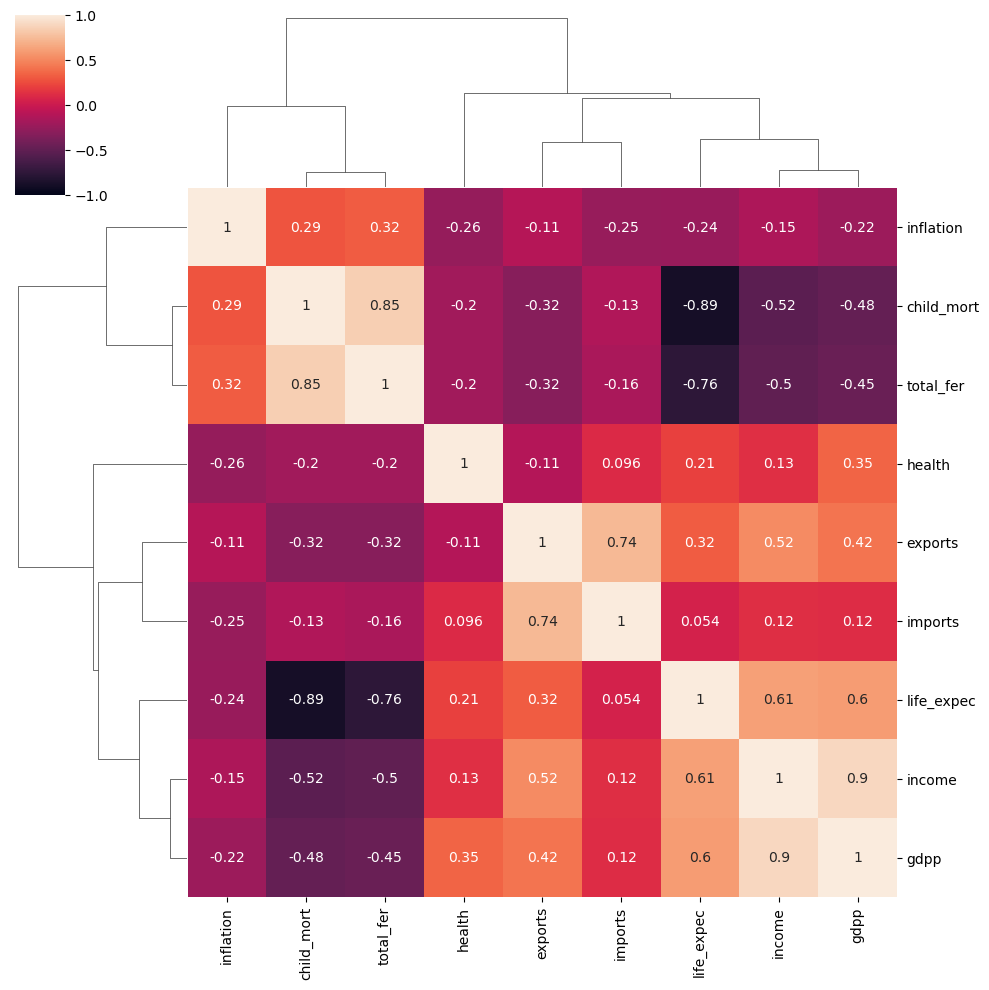

In [7]:
plt.figure(figsize = (4, 4))
clustermap = sns.clustermap(X.corr(), vmin = -1, vmax = 1, annot = True)

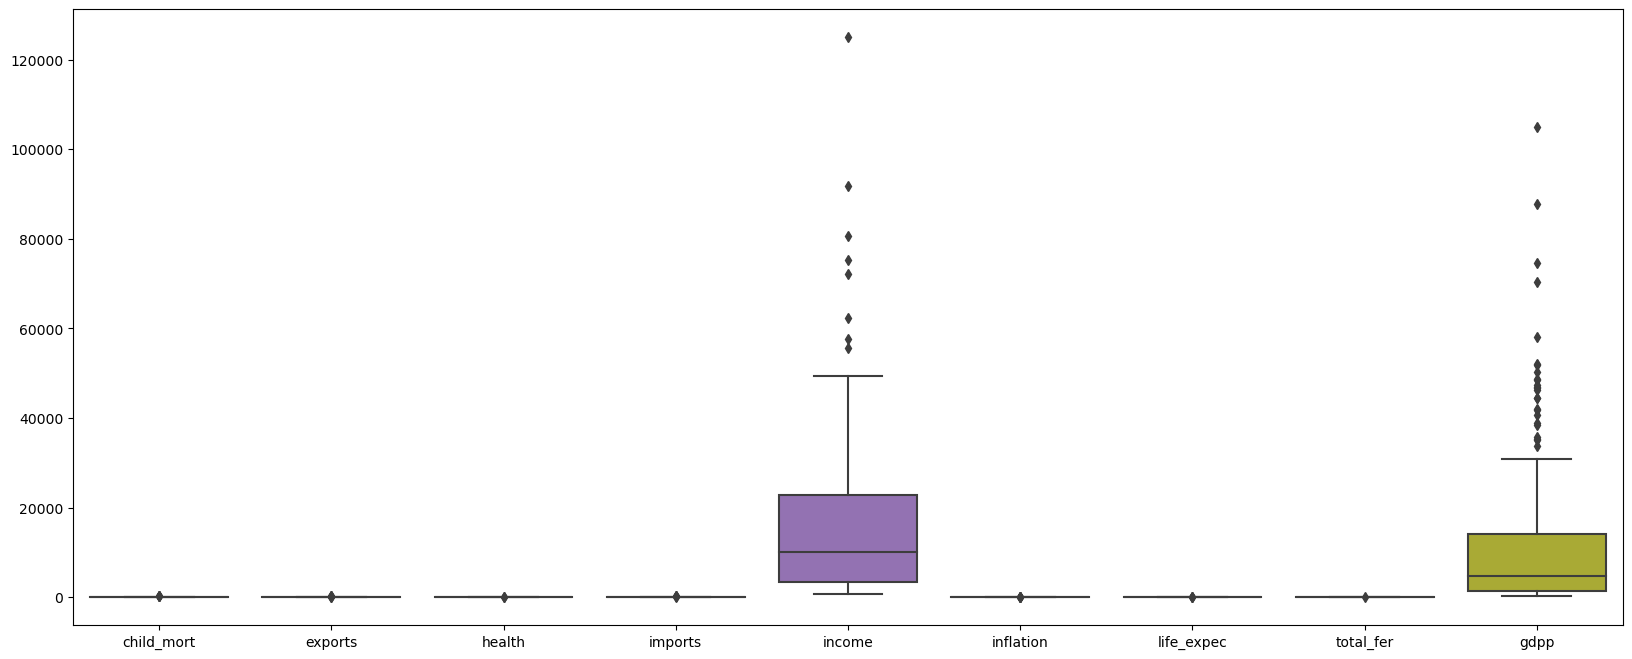

In [8]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = X, width = 0.8)
plt.show()

In [9]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
X

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

### PCA : Principle Component Analysis

PCA is applied to reduce the dimensions to 6 principal components.
explained_variance_ratio_ gives the proportion of variance explained by each component.
This code then neatly prints the explained variance and cumulative variance so you can see how much information is being captured by each additional component.

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
X = pca.fit_transform(X)

In [13]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Print explained variance for each component
for i, variance in enumerate(explained_variance):
    print(f"Principal Component {i+1}: {variance:.4f}")

# Print cumulative explained variance
for i, cumulative_variance in enumerate(cumulative_variance):
    print(f"Principal Components 1 to {i+1}: {cumulative_variance:.4f}")
    

Principal Component 1: 0.4595
Principal Component 2: 0.1718
Principal Component 3: 0.1300
Principal Component 4: 0.1105
Principal Component 5: 0.0734
Principal Component 6: 0.0248
Principal Components 1 to 1: 0.4595
Principal Components 1 to 2: 0.6313
Principal Components 1 to 3: 0.7614
Principal Components 1 to 4: 0.8719
Principal Components 1 to 5: 0.9453
Principal Components 1 to 6: 0.9702


### Determining Optimal Number of Clusters (Elbow Method)

The elbow method is used to find the optimal number of clusters.

It iterates over different cluster numbers, calculates the Within-Cluster Sum of Squares (WCSS), and plots the results.

The "elbow" point on the plot suggests a good number of clusters, balancing model complexity and information capture.

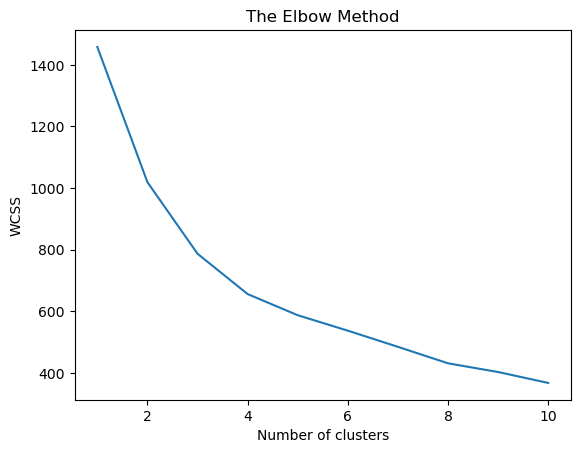

In [14]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### K-Means Clustering

This code snippet implements the K-Means clustering algorithm. Here's what it does:

 #### Initialization:

    1. n_clusters = 3: Sets the desired number of clusters based on the results of the Elbow Method.

    2. init = 'k-means++': A smart initialization method that helps avoid poor cluster assignments.
    random_state = 42: Fixes the random seed for reproducibility.
#### Fitting and Prediction:
    1. kmeans.fit(X): Fits the K-Means model to the transformed data X (principal components). This means finding the optimal centroids for each cluster.
    2. kmeans.predict(X): Assigns each data point in X to one of the clusters, based on its proximity to the                calculated centroids.
    3. y_kmeans: The resulting array contains cluster labels for each country.

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [21]:
y_kmeans

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

### Map Clusters Back to Countries

In [22]:
df['cluster'] = y_kmeans

### Analyze Cluster Characteristics:

To calculate summary statistics (mean, median, etc.) for each cluster across your different socio-economic indicators, you can use the groupby method and the describe method.

In [26]:
cluster_stats = df.groupby('cluster').describe()
print(cluster_stats)

        child_mort                                                           \
             count       mean        std   min    25%   50%      75%    max   
cluster                                                                       
0             86.0  22.456977  14.077521   4.5  11.70  18.7   29.175   64.4   
1             36.0   5.000000   2.188933   2.6   3.55   4.2    5.750   10.8   
2             45.0  95.106667  32.422133  53.7  66.80  90.3  111.000  208.0   

        exports             ... total_fer        gdpp                \
          count       mean  ...       75%   max count          mean   
cluster                     ...                                       
0          86.0  40.273128  ...    2.6700  4.56  86.0   6461.767442   
1          36.0  58.738889  ...    1.9575  3.03  36.0  42494.444444   
2          45.0  28.602444  ...    5.7100  7.49  45.0   1766.711111   

                                                                     
                  std      m

This will create a new DataFrame cluster_stats that contains summary statistics (mean, median, count, etc.) for each cluster across all the socio-economic indicators.

### Visualize Clusters


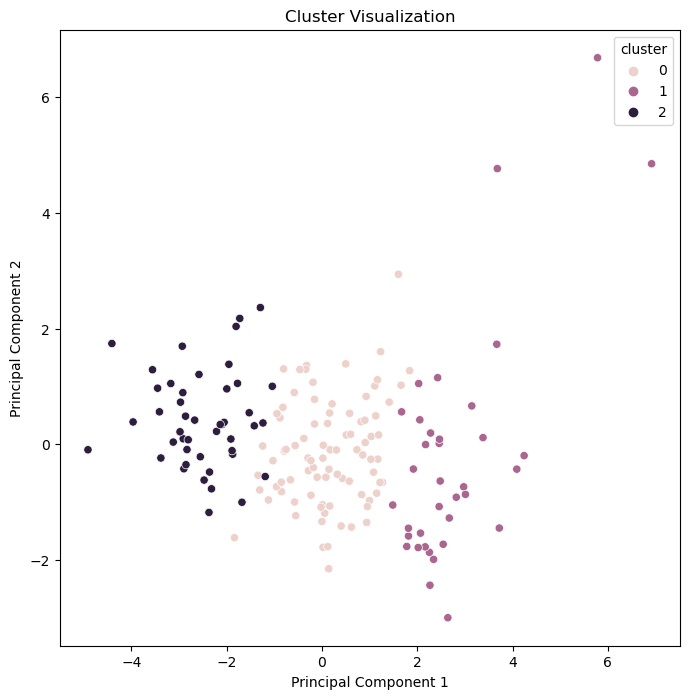

In [27]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['cluster'])
plt.title('Cluster Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### This graph shows the clustering results of our socio-economic indicators using K-Means clustering
This will create a scatter plot of the first two principal components, with each point colored by its cluster label. You can adjust the x and y axes to visualize different principal components.